# 1 IMPORTS

In [1]:
import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mtplt
import datetime as datetime


## 1.1 Loading Data

In [2]:
df_raw_2017 = pd.read_csv('IST_Civil_Pav_2017_Ene_Cons.csv')  
df_raw_2018 = pd.read_csv('IST_Civil_Pav_2018_Ene_Cons.csv')

# 2 DATA DESCRIPTION


## 2.1 Data Preview

In [4]:
display(df_raw_2017.head(3),df_raw_2018.head(3))

,Date_start,Date_end,Duration,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW
0,1/1/2017 0:00,1/1/2017 1:00,NaN,180.769,194.099,17.472,392.340,74.897706
1,1/1/2017 1:00,1/1/2017 2:00,NaN,175.629,196.974,21.183,393.785,75.173556
2,1/1/2017 2:00,1/1/2017 3:00,NaN,172.005,196.694,20.030,388.728,74.208175


,Date_start,Date_end,Duration,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW
0,1/1/2018 0:00,1/1/2018 1:00,NaN,177.196,90.603,42.347,310.146,59.206871
1,1/1/2018 1:00,1/1/2018 2:00,NaN,175.660,92.497,25.173,293.330,55.996697
2,1/1/2018 2:00,1/1/2018 3:00,NaN,177.582,90.941,24.020,292.543,55.846459


### 2.2 Data Format and types

In [5]:
df_raw_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date_start   8760 non-null   object 
 1   Date_end     8760 non-null   object 
 2   Duration     0 non-null      float64
 3   Current1_Ah  8759 non-null   float64
 4   Current2_Ah  8759 non-null   float64
 5   Current3_Ah  8759 non-null   float64
 6   Total_Ah     8759 non-null   float64
 7   Power_kW     8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.6+ KB


### Some Important Observations:
- As we can see the `Duration` column has 0's samples with descriptive values (NaN values for all the samples), so can promptly delete this column.
- The `Date_start` and `Date_end` are of type object, so we must convert it into Datetime format.
- There is no need to have `Date_end` as it has the same values as `Date_start`.
- Same conclusion can be drawn for the other data set.

In order to avoid spending time working with the two different dataframes, it is worth joining them into a single dataframe, this can be done using the append method from the pandas. As the goal is to predict the electricity consumption, one needs to come up with holydays as it would effect the electricity consumption of the Tower.

##### For more informations, these links would be useful:

| # | Links |
| :----- | :----- |
| Holydays 2018 | https://www.calendarr.com/portugal/feriados-2018/|
| Holydays 2017 | https://www.calendarr.com/portugal/feriados-2019/|
| School calendar 2017  | https://tecnico.ulisboa.pt/files/2016/07/calendario-escolar-2016-2017.pdf |
| School calendar 2018 | http://conselhopedagogico.tecnico.ulisboa.pt/files/sites/32/final-calendario-escolar-2017_2018.pdf |
| School calendar 2019 | https://conselhopedagogico.tecnico.ulisboa.pt/files/sites/32/calendario_2018_2019.pdf |


In [10]:
df_all=df_raw_2017.append(df_raw_2018,ignore_index=True, sort=False) 
df_all.drop(columns = ['Duration'] , inplace = True)
df_all.drop(columns = ['Date_end'] , inplace = True)
df_all.rename(columns={'Date_start':'Date'},inplace=True)

In [11]:
df_all

,Date,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW
0,1/1/2017 0:00,180.769,194.099,17.472,392.340,74.897706
1,1/1/2017 1:00,175.629,196.974,21.183,393.785,75.173556
2,1/1/2017 2:00,172.005,196.694,20.030,388.728,74.208175
3,1/1/2017 3:00,175.498,193.354,17.403,386.254,73.735889
4,1/1/2017 4:00,178.418,194.055,20.940,393.412,75.102351
...,...,...,...,...,...,...
17515,31-12-2018 19:00,319.527,103.124,98.322,520.973,99.453746
17516,31-12-2018 20:00,274.861,103.338,57.569,435.768,83.188111
17517,31-12-2018 21:00,271.181,105.723,56.332,433.236,82.704752
17518,31-12-2018 22:00,259.633,105.985,56.688,422.307,80.618406


In [16]:
holidayPT_2017_2018 = ['2017-01-01', '2017-04-14', '2017-04-16', '2017-04-25', '2017-05-01', '2017-06-10', '2017-06-15', 
                  '2017-08-15', '2017-10-05', '2017-11-01', '2017-12-01', '2017-12-08', '2017-12-25',
                  '2018-01-01', '2018-03-30', '2018-04-01', '2018-04-25', '2018-05-01', '2018-05-31', '2018-06-10',  
                  '2018-08-15', '2018-10-05', '2018-11-01', '2018-12-01', '2018-12-08', '2018-12-25']
                    
holidayPT_2019 = ['2019-01-01', '2019-04-19', '2019-04-21', '2019-04-25', '2019-05-01', '2019-06-10', '2019-06-20',  
                  '2019-08-15', '2019-10-05', '2019-11-01', '2019-12-01', '2019-12-08', '2019-12-25']

uni_holiday_2017_2018 = [('2017-02-16', '2017-02-19'), ('2017-02-27', '2017-02-28'), ('2017-04-10', '2017-04-14'),
                    ('2017-08-01', '2017-09-10'), ('2017-12-23', '2017-12-29'), ('2018-02-15', '2018-02-18'),
                    ('2018-03-26', '2018-03-30'), ('2018-08-01', '2018-09-09'), ('2018-12-22', '2018-12-31')]
            
uni_holiday_2019 = [('2019-02-15', '2019-02-17'), ('2019-03-04', '2019-03-05'), ('2019-04-15', '2019-04-19'),  
                   ('2019-08-01', '2019-09-08'), ('2019-12-21', '2020-01-02')]

df_all['Date']=pd.to_datetime(df_all['Date'])
df_all['Holiday'] = [df_all['Date'][i].strftime("%Y-%m-%d") in holidayPT_2017_2018 or uni_holiday_2017_2018 for i in range(df_all.shape[0])]
df_all['Holiday'] = (df_all['Holiday'] == True).astype(int) #Convert all columns from bolean to integers

df_all.head(4)

,Date,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW,Holiday
0,2017-01-01 00:00:00,180.769,194.099,17.472,392.340,74.897706,1
1,2017-01-01 01:00:00,175.629,196.974,21.183,393.785,75.173556,1
2,2017-01-01 02:00:00,172.005,196.694,20.030,388.728,74.208175,1
3,2017-01-01 03:00:00,175.498,193.354,17.403,386.254,73.735889,1


### 2.3 Add weather data into our main dataframe

In [19]:
df_raw_meteo_2017_2018_2019=pd.read_csv('IST_meteo_data_2017_2018_2019 .dat')
df_raw_meteo_2017_2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215009 entries, 0 to 215008
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   yyyy-mm-dd hh:mm:ss  215009 non-null  object 
 1   temp_C               215009 non-null  float64
 2   HR                   215009 non-null  float64
 3   windSpeed_m/s        215009 non-null  float64
 4   windGust_m/s         215009 non-null  float64
 5   pres_mbar            215009 non-null  int64  
 6   solarRad_W/m2        215009 non-null  float64
 7   rain_mm/h            215009 non-null  float64
 8   rain_day             215009 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ MB


### Some observations from the raw data
- As we can clearly see these data were acquired with a samples rate at each 5 minutes and since our main data set was acquired we need to average the weather data up to hour interval so that the model will be more representative as possible.
- Filter data set only from 2017 to 2018 to corresponds to the main data set
- Merge the data sets into a single one as done in previosuly and we are done to proceed into the next stage of project.

In [29]:
df_raw_meteo_2017_2018_2019.rename(columns={'yyyy-mm-dd hh:mm:ss':'Date'},inplace=True)
df_raw_meteo_2017_2018_2019['Date']=pd.to_datetime(df_raw_meteo_2017_2018_2019['Date'])
df_raw_meteo_2017_2018_2019=df_raw_meteo_2017_2018_2019.sort_values(by=['Date'])
df_raw_meteo_2017_2018_2019['Date']=df_raw_meteo_2017_2018_2019['Date'].dt.floor("H")

def helper(df):
    date = df.loc[0, 'Date']
    row_index_list = []
    df_meteo_avg = pd.DataFrame()
    column_list=list(df.columns)
    column_calc_list=column_list.copy()
    # Remove those unwanted columns
    column_calc_list.remove('Date') 
    column_calc_list.remove('rain_day')
    
    # loop through samples
    for i in range(0, df.shape[0]):
        if df.loc[i, 'Date'] == date:
            row_index_list.append(i) # append this line
        else:
            avg_array = df[column_calc_list].iloc[row_index_list].mean(axis=0).values.tolist()
            avg_array.insert(0,date) # add date to the begining 
            avg_array.append(df['rain_day'][row_index_list[-1]])
            # Get values to a new DataFrame
            df_meteo_avg = df_meteo_avg.append(pd.DataFrame([avg_array], columns=column_list), ignore_index=True)
            row_index_list = [i]
            date = df.loc[i, 'Date']
    return df_meteo_avg
            

In [30]:
df_meteo_avg = helper(df_raw_meteo_2017_2018_2019) # this takes a few minutes !!!

In [34]:
df_meteo_clean=df_meteo_avg[df_meteo_avg['Date']<datetime.datetime.strptime('01-01-2019 00:00', '%d-%m-%Y %H:%M')]
df = pd.merge(df_all,df_meteo_clean, on = 'Date' )

In [35]:
df

,Date,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW,Holiday,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,180.769,194.099,17.472,392.340,74.897706,1,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0
1,2017-01-01 01:00:00,175.629,196.974,21.183,393.785,75.173556,1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0
2,2017-01-01 02:00:00,172.005,196.694,20.030,388.728,74.208175,1,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0
3,2017-01-01 03:00:00,175.498,193.354,17.403,386.254,73.735889,1,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0
4,2017-01-01 04:00:00,178.418,194.055,20.940,393.412,75.102351,1,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,2018-12-31 19:00:00,319.527,103.124,98.322,520.973,99.453746,0,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0
15480,2018-12-31 20:00:00,274.861,103.338,57.569,435.768,83.188111,0,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0
15481,2018-12-31 21:00:00,271.181,105.723,56.332,433.236,82.704752,0,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0
15482,2018-12-31 22:00:00,259.633,105.985,56.688,422.307,80.618406,0,11.926667,56.530000,0.000000,0.000000,1031.000000,1.117000,0.0,0.0


# EXPLORATORY DATA ANALYSIS

In [36]:
df.dtypes

Date             datetime64[ns]
Current1_Ah             float64
Current2_Ah             float64
Current3_Ah             float64
Total_Ah                float64
Power_kW                float64
Holiday                   int64
temp_C                  float64
HR                      float64
windSpeed_m/s           float64
windGust_m/s            float64
pres_mbar               float64
solarRad_W/m2           float64
rain_mm/h               float64
rain_day                float64
dtype: object

### 3.1 Check NA

In [38]:
df.isna().mean()

Date             0.000000
Current1_Ah      0.006458
Current2_Ah      0.006458
Current3_Ah      0.006458
Total_Ah         0.006458
Power_kW         0.000000
Holiday          0.000000
temp_C           0.000000
HR               0.000000
windSpeed_m/s    0.000000
windGust_m/s     0.000000
pres_mbar        0.000000
solarRad_W/m2    0.000000
rain_mm/h        0.000000
rain_day         0.000000
dtype: float64

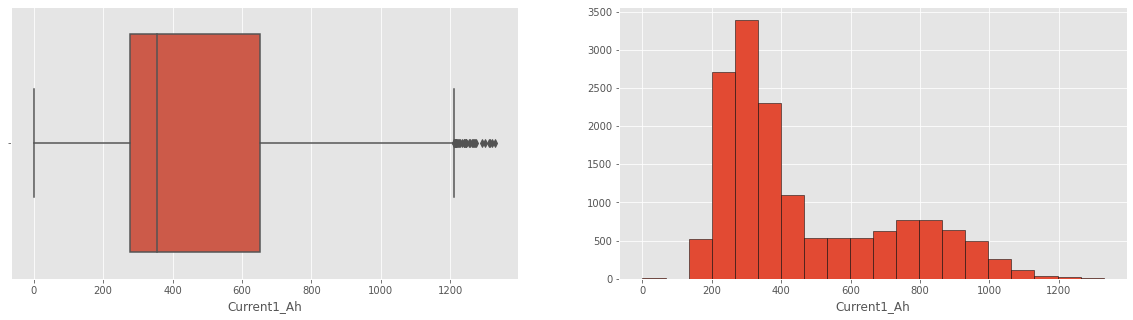

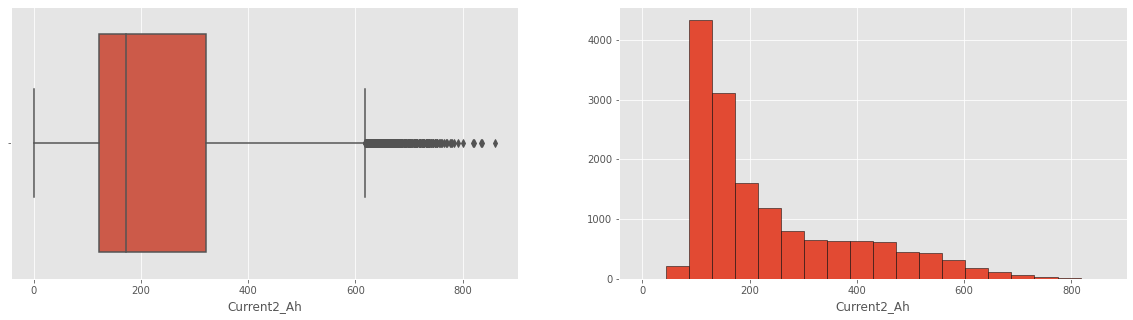

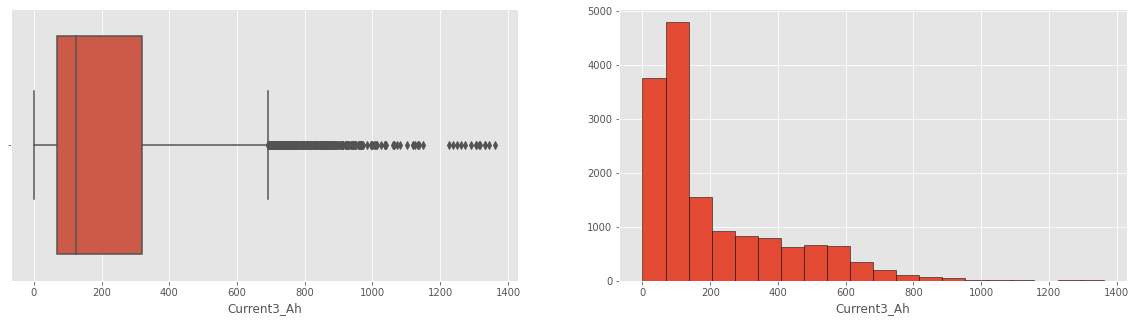

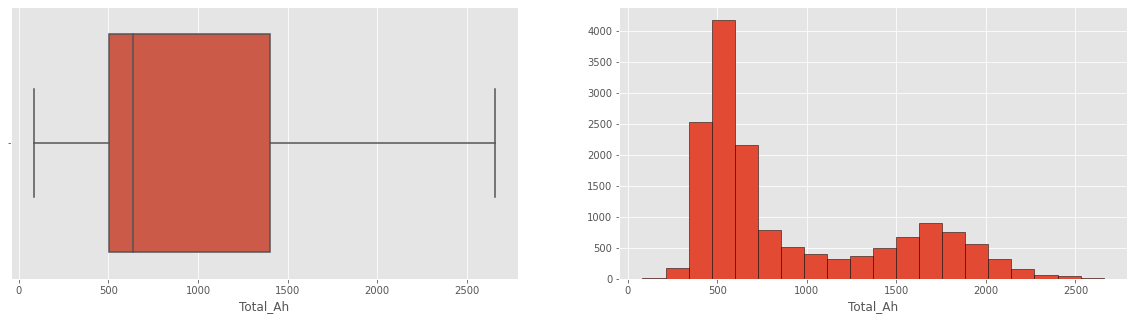

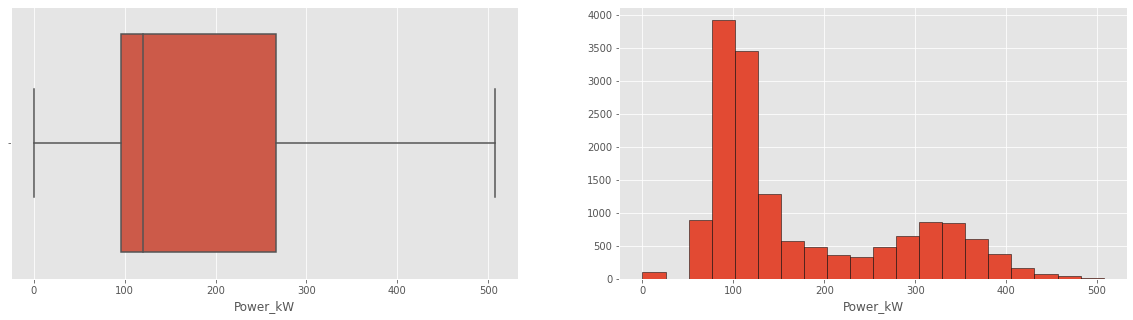

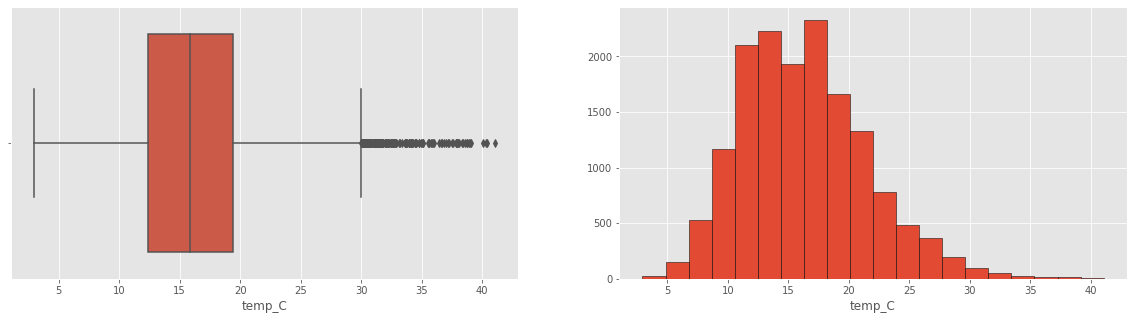

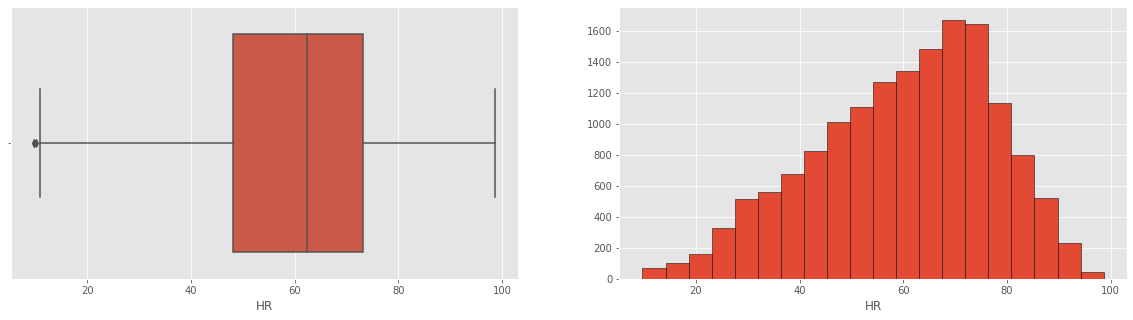

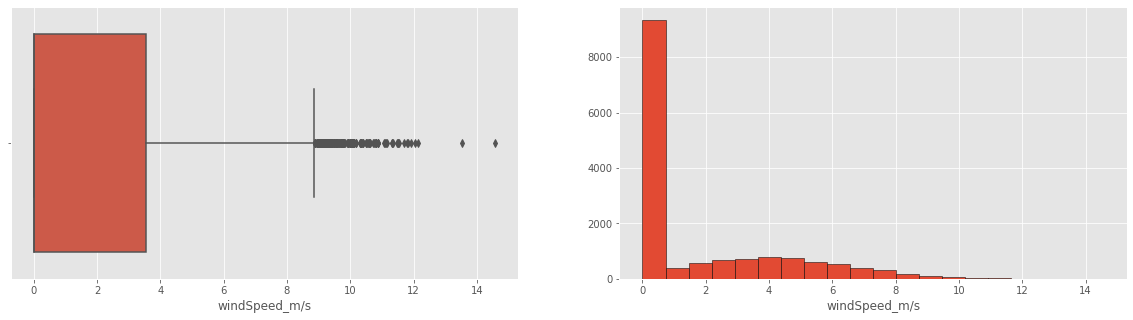

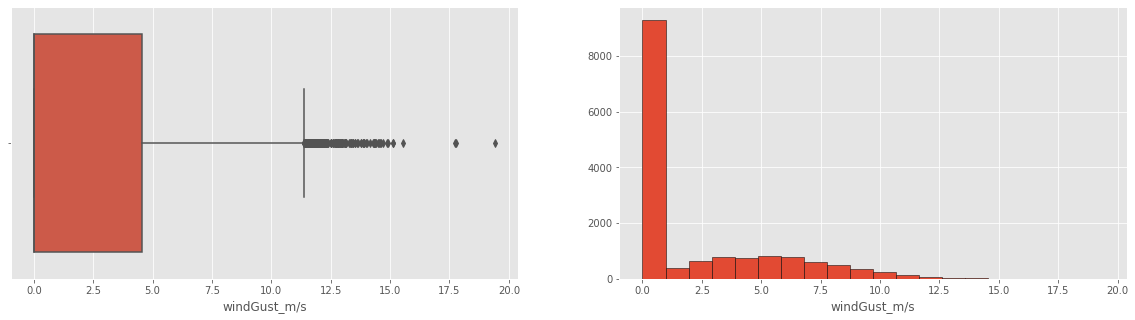

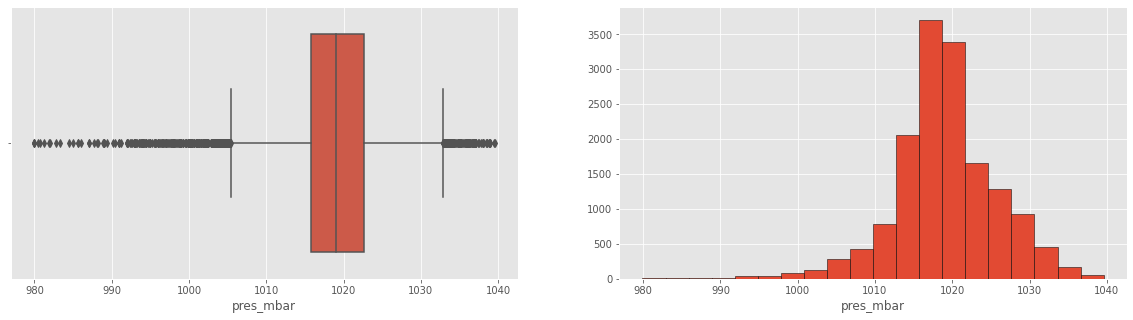

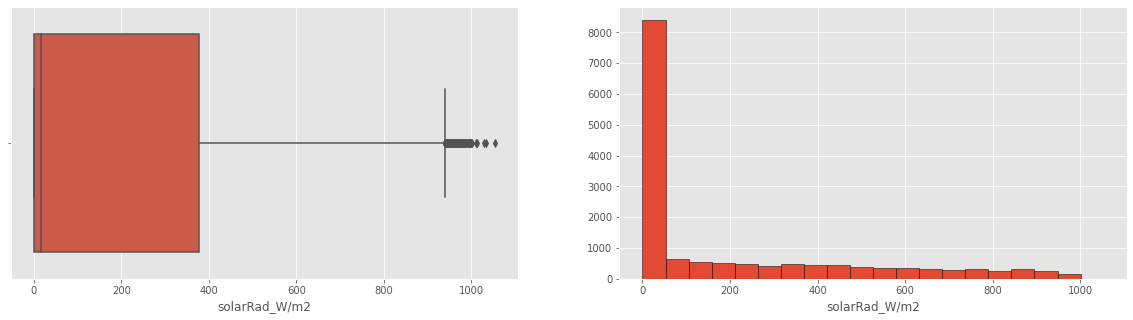

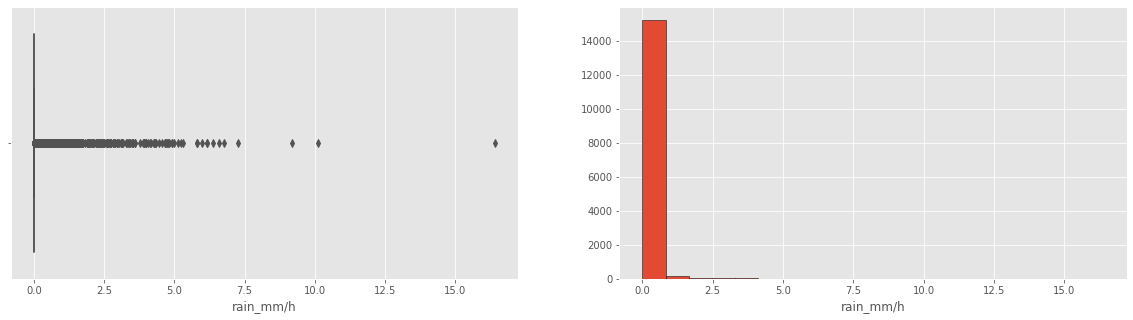

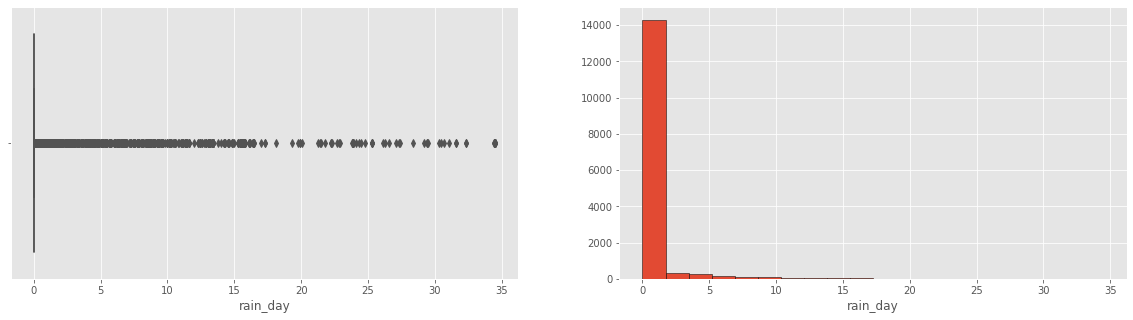

In [42]:
import warnings  #warning
warnings.filterwarnings('ignore') #ignore it
plt.style.use('ggplot') #a special plot type


def Plot_col(df_plot_time,n_bins, ec = 'k'):
   
    for col in df_plot_time.columns:
        if (col!= 'Date') & (col!= 'Holiday') :#Obviously these two have no outliers
            
            fig=plt.figure()
            fig.set_size_inches(20,5)
            fig.add_subplot(121)
            sns.boxplot(df_plot_time[col])
            fig.add_subplot(122)
            data, bins,patches = plt.hist(df_plot_time[col],n_bins, ec = 'k');
            plt.xlabel(col)
            plt.show()
            
Plot_col(df, 20)

### 3.2 Z score (number of standard deviation) 
 measure exatly how many the standard deviation above or below a point is
 * A positive value indicate the point is above the mean
 - A negative value indicate the point is below the mean
 - Uusual point  if z is beteween 3 and -3
 
 Formula : $Z = \frac{x - \mu}{\sigma}$

In [45]:
from scipy import stats
z = np.abs(stats.zscore(df['Power_kW']))
print(z)
# it is not easy to see outliers, we have to use the IQR method for each column, to detect outlier


[0.93730719 0.93469536 0.94383586 ... 0.86338788 0.88314199 0.93546354]


### 3.3  IQR score
 Is calculated as the difference between the upper and lower quartiles, Q3 and Q1. Each quartile is a median ,
 calculated as follows:
 * Given an even 2n or odd 2n+1 number of values <br>
 . $Q_1= dcf^{-1}(0.25)$; <br>
 . $Q_3= cdf^{-1}(0.75)$ . <br>
 Where the $cdf^{-1}$ is a quantifle function 

In [76]:
column_list=list(df.columns)    
column_list.remove('Date')      #these two have no outliers
column_list.remove('Holiday')   

q1,q3 = [],[]
for col in column_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    q1.append(Q1)
    q3.append(Q3)
    df.loc[((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))), col]=np.nan
    

data = pd.DataFrame(columns=[column_list, q1,q3]).T

In [78]:
data

,,
Current1_Ah,277.653250,647.030500
Current2_Ah,115.186750,210.928750
Current3_Ah,56.912000,126.731500
Total_Ah,504.112500,1403.213250
Power_kW,95.845497,266.540021
temp_C,12.345417,19.231875
HR,48.138333,73.225000
windSpeed_m/s,0.000000,3.272250
windGust_m/s,0.000000,4.255812
pres_mbar,1016.000000,1022.000000


- Any data points less than the lower bound or more than the upper bound is consider as na outlier

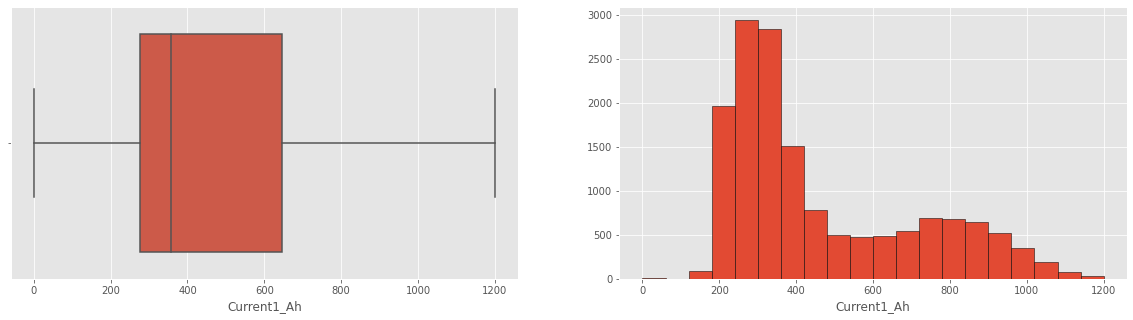

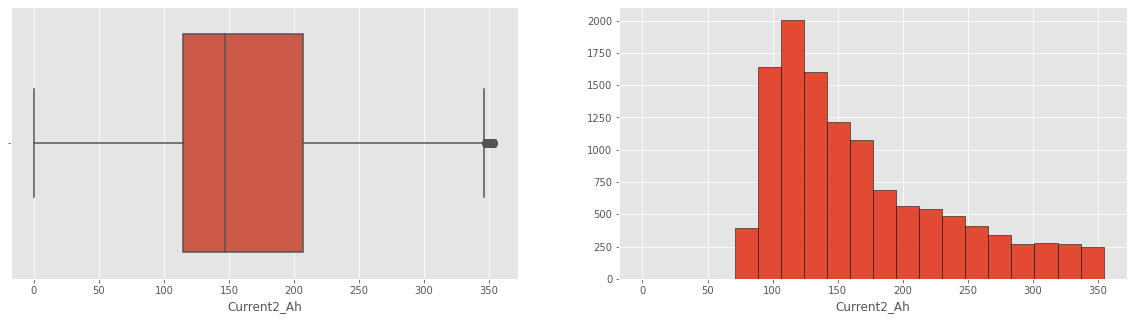

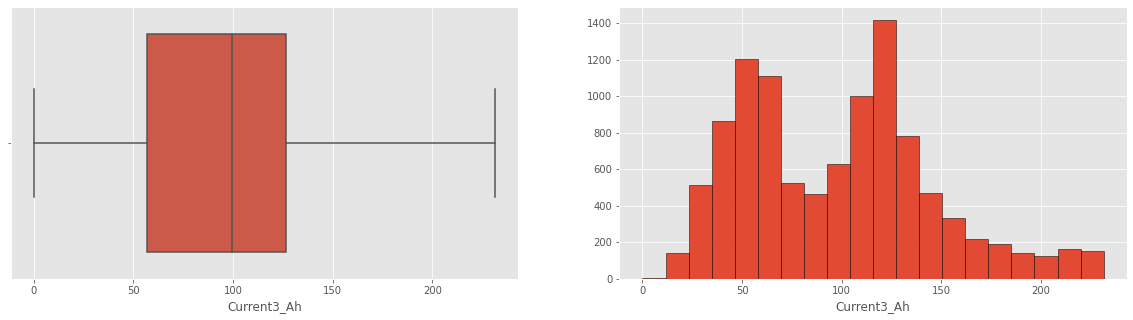

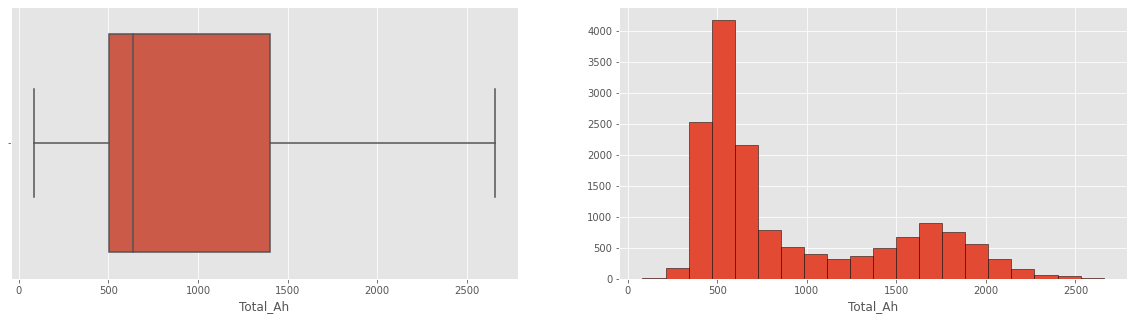

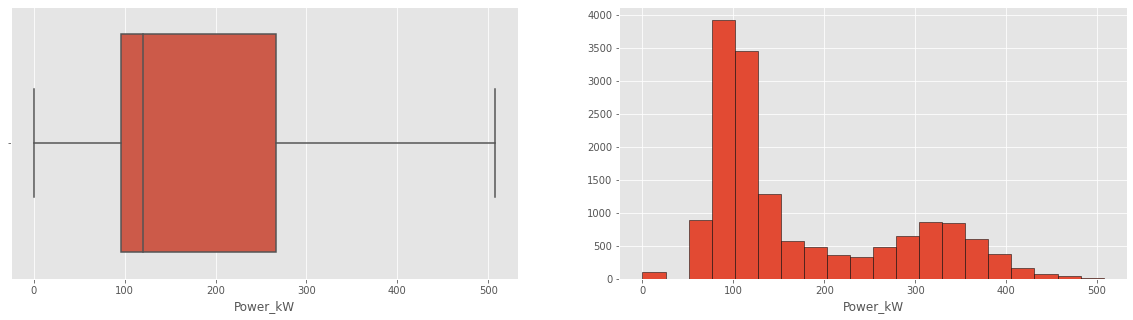

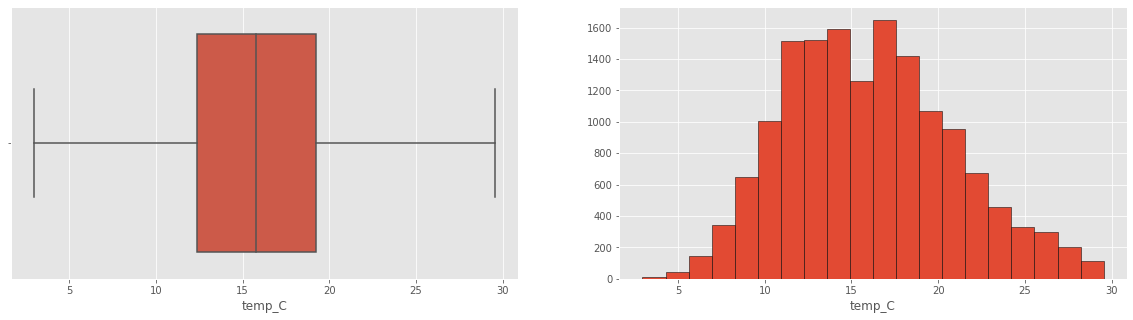

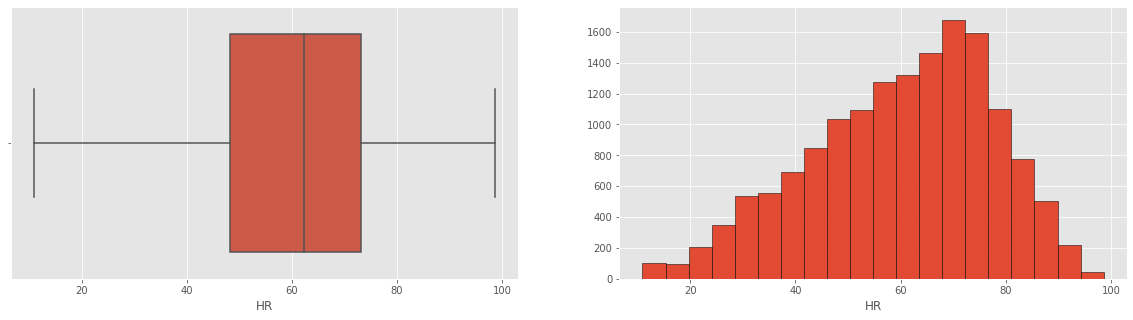

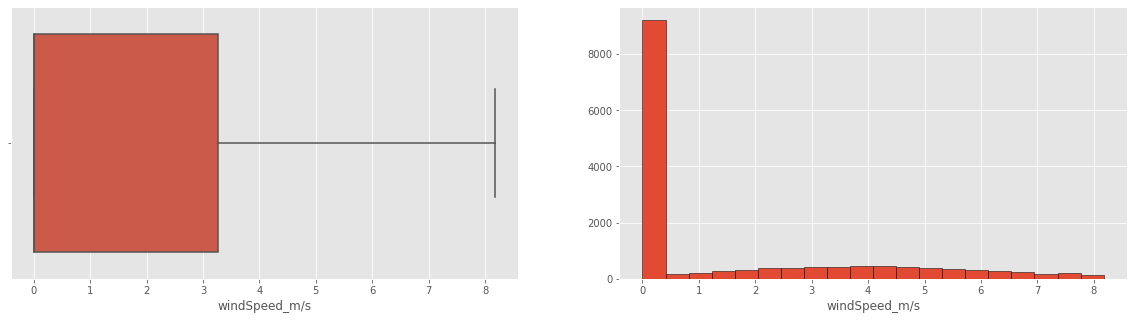

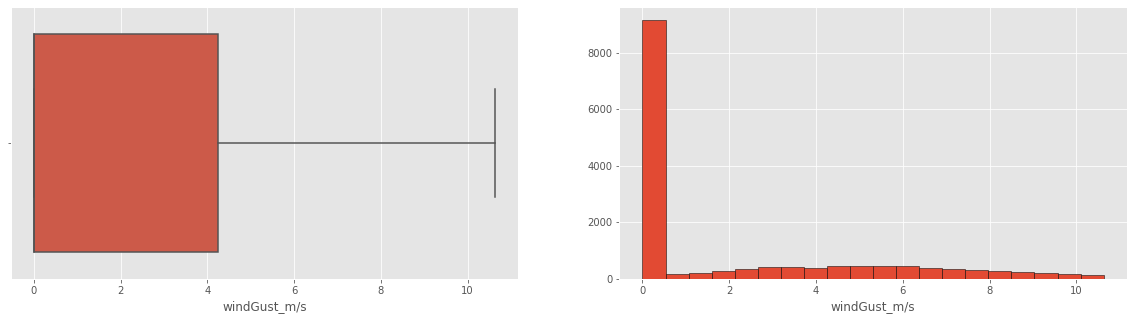

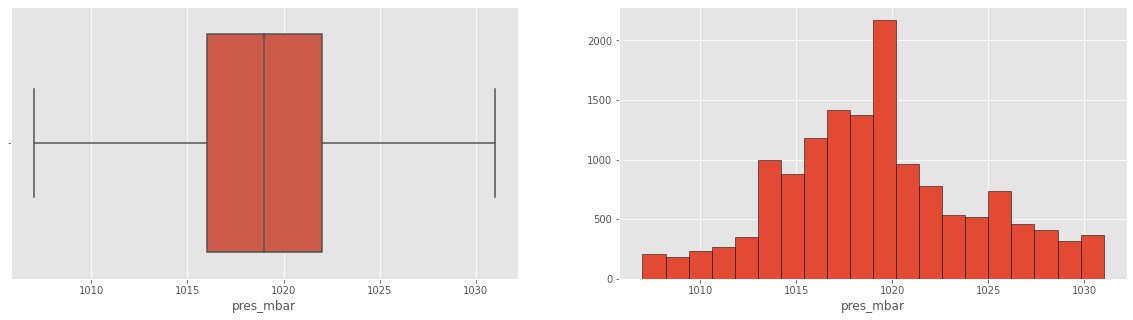

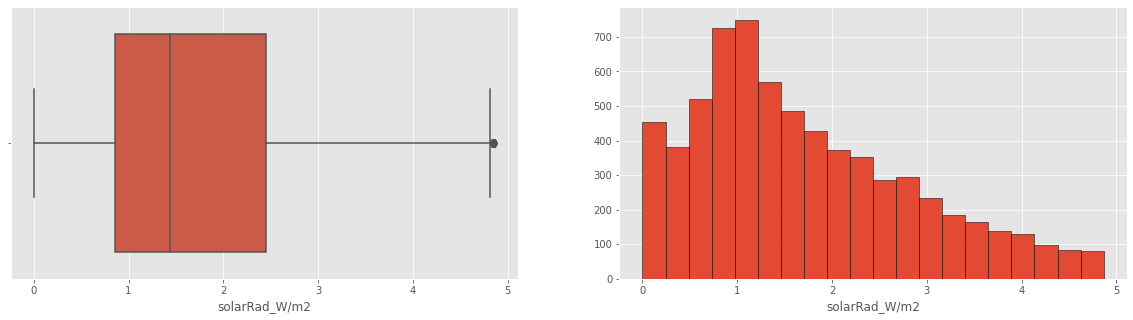

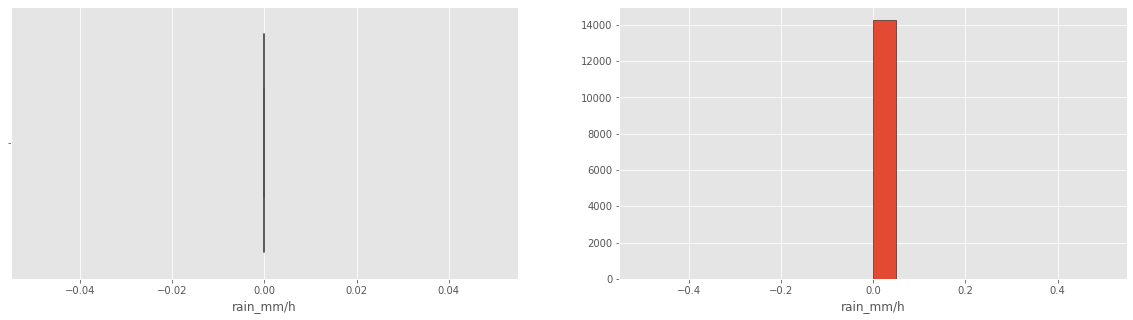

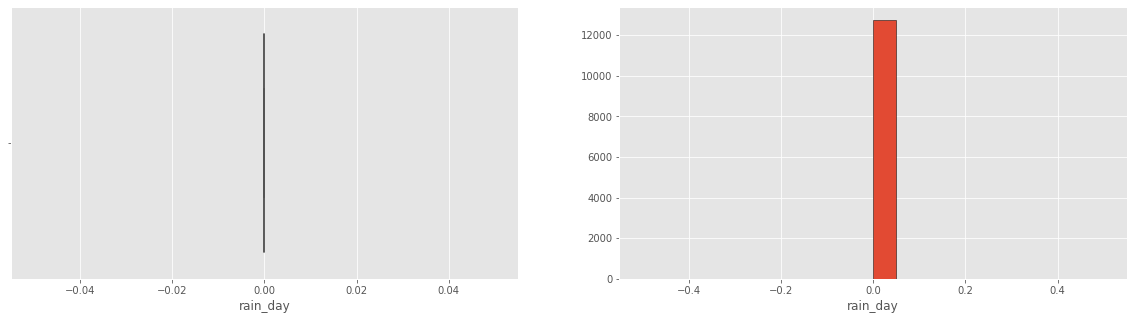

In [79]:
Plot_col(df, 20)

In [85]:
print(df.columns)

df1 = df.copy(deep = True)
df1.drop(columns = ['rain_mm/h', 'rain_day'] , inplace = True)

Index(['Date', 'Current1_Ah', 'Current2_Ah', 'Current3_Ah', 'Total_Ah',
       'Power_kW', 'Holiday', 'temp_C', 'HR', 'windSpeed_m/s', 'windGust_m/s',
       'pres_mbar', 'solarRad_W/m2', 'rain_mm/h', 'rain_day'],
      dtype='object')


In [86]:
df1

,Date,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW,Holiday,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2
0,2017-01-01 00:00:00,180.769,194.099,17.472,392.340,74.897706,1,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083
1,2017-01-01 01:00:00,175.629,196.974,21.183,393.785,75.173556,1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333
2,2017-01-01 02:00:00,172.005,196.694,20.030,388.728,74.208175,1,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083
3,2017-01-01 03:00:00,175.498,193.354,17.403,386.254,73.735889,1,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000
4,2017-01-01 04:00:00,178.418,194.055,20.940,393.412,75.102351,1,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,2018-12-31 19:00:00,319.527,103.124,98.322,520.973,99.453746,0,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333
15480,2018-12-31 20:00:00,274.861,103.338,57.569,435.768,83.188111,0,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417
15481,2018-12-31 21:00:00,271.181,105.723,56.332,433.236,82.704752,0,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500
15482,2018-12-31 22:00:00,259.633,105.985,56.688,422.307,80.618406,0,11.926667,56.530000,0.000000,0.000000,1031.000000,1.117000


### 3.4 Features' Heat Map

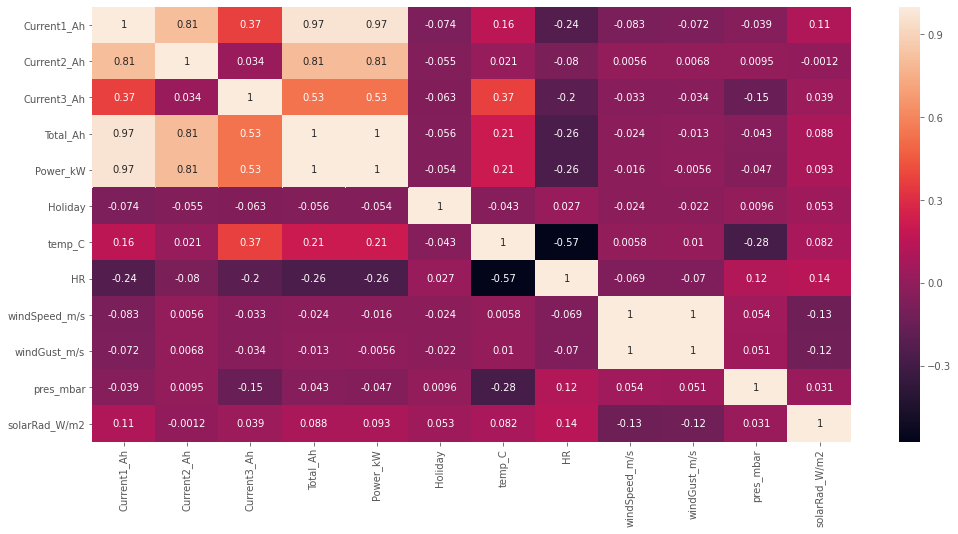

In [88]:
fig, ax = plt.subplots(figsize = (17,8))
corr = df1.corr()
ax = sns.heatmap(corr, annot=True,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
plt.show()

- Power consumption is a great correlation with the temperature of the tower as expected

In [89]:
df1.to_csv('data_After_preprocessing.csv',index = False)